In [1]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import RFE
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import StratifiedKFold

iris = load_iris()
X, y = iris.data, iris.target

rfe = RFE(LogisticRegression(random_state=0))
param_grid = {'n_features_to_select': range(1, 5)}
grid = GridSearchCV(rfe, param_grid, cv=StratifiedKFold(y))


In [2]:
%%timeit
grid.fit(X, y)

10 loops, best of 3: 27.3 ms per loop


In [3]:
grid.best_score_

0.95333333333333337

In [4]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(LogisticRegression(random_state=0), cv=StratifiedKFold(y))


In [5]:
%%timeit
rfecv.fit(X, y)


100 loops, best of 3: 11.7 ms per loop


In [6]:
rfecv.grid_scores_

array([ 0.85457516,  0.90727124,  0.95424837,  0.94689542])

Computing regularization path using the LARS ...
.

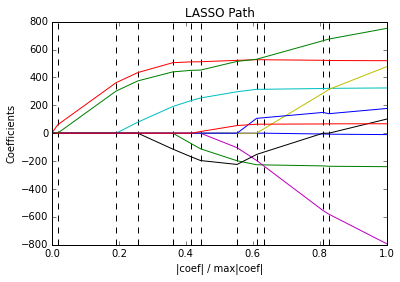

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

print("Computing regularization path using the LARS ...")
alphas, _, coefs = linear_model.lars_path(X, y, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()



In [8]:
from sklearn.cross_validation import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
grid_search = GridSearchCV(linear_model.LassoLars(), param_grid={'alpha': np.logspace(-5, 3)})


In [14]:
%%timeit
grid_search.fit(X, y)


1 loops, best of 3: 191 ms per loop


In [15]:
print(grid_search.best_params_)
print(grid_search.score(X_test, y_test))

{'alpha': 0.012648552168552958}
0.470640766538


In [16]:
lasso = linear_model.LassoLarsCV()

In [17]:
%%timeit
lasso.fit(X, y)


100 loops, best of 3: 6.66 ms per loop


In [18]:
print(lasso.alpha)
print(lasso.score(X_test, y_test))

0.0111807785029
0.469543060568
